In [ ]:
from sklearn.pipeline import Pipeline
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB

In [2]:
iris = pd.read_csv("Datasets/iris.csv", index_col=0)
iris.head()

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [3]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
X, y = iris.drop('Species', axis=1), iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_proba = lda.predict_proba(X_test) 
y_pred = lda.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Log_loss: ", log_loss(y_test, y_pred_proba))

Accuracy:  0.9777777777777777
Log_loss:  0.07913704410316715


In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_proba = qda.predict_proba(X_test) 
y_pred = qda.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Log_loss: ", log_loss(y_test, y_pred_proba))

Accuracy:  0.9555555555555556
Log_loss:  0.05286536744158846


In [6]:
iris = pd.read_csv("Datasets/iris.csv", index_col=0)
iris.head()

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [ ]:
import ipywidgets as widgets
import seaborn as sns

features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
def plot(col1, col2):
    sns.scatterplot(data=iris, x=col1, y=col2, hue='Species')
    plt.show()

widgets.interact(plot, col1=features, col2=features)

interactive(children=(Dropdown(description='col1', options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Pe…

<function __main__.plot(col1, col2)>

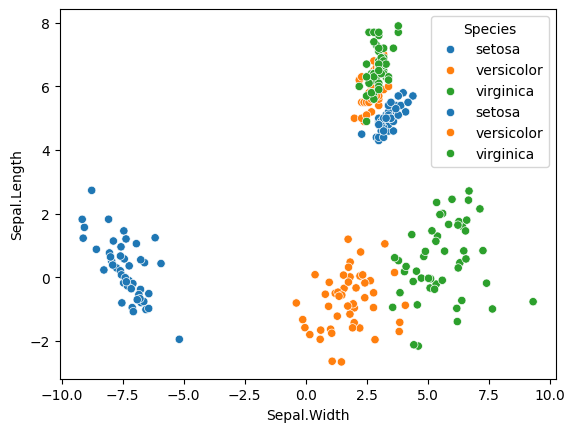

In [19]:

sns.scatterplot(data=iris, x='Sepal.Width', y='Sepal.Length', hue='Species')
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X, y = iris.drop('Species', axis=1), iris['Species']
lda_components = lda.fit_transform(X, y)
lda_components['Species'] = y
sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0', y='lineardiscriminantanalysis1', hue='Species')
plt.show()

#### Vehicle silhouettes Dataset

In [15]:
vehicle = pd.read_csv("Cases/Vehicle_Silhouettes/Vehicle.csv")
vehicle.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [17]:
le = LabelEncoder()
vehicle['Class'] = le.fit_transform(vehicle['Class'])
X, y = vehicle.drop('Class', axis=1), vehicle['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [18]:
features = list(X.columns)
def plot(col1, col2):
    sns.scatterplot(data=vehicle, x=col1, y=col2, hue='Class')
    plt.show()

widgets.interact(plot, col1=features, col2=features)

interactive(children=(Dropdown(description='col1', options=('Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', …

<function __main__.plot(col1, col2)>